# Numerische Funktionen

- isNumeric 
- Zufallszahlen (zB RAND)
- Runden
- Absolutbetrag & Vorzeichen
- Potenzen und Wurzeln
- Winkelfunktionen (eigenes File)
- Exponential- und Logarithmische Funktionen (eignes File)

## isNumeric

Prüfen, ob ein Text eine Zahl ist  

<span class="hljs-keyword" style="box-sizing: inherit; outline-color: inherit; color: rgb(1, 1, 253); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">ISNUMERIC</span> <span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">( expression ) =&gt; int: </span> 0 nein | 1 = ja

Anmerkungen:

- Texte mit Währungssymbolen werden nicht als Zahl erkannt
- Exponential-Schreibweise wird als Zahl erkannt

In [ ]:
Select isNumeric('5')
Select isNumeric(5)
Select isNumeric('-5')
Select isNumeric('5$')
Select isNumeric('-5$')
Select isNumeric('5e10')

Prüfen Sie, ob die Spalte \[PostalCode\] in der Tabelle \[Person\].\[Address\] numerisch ist?

In [ ]:
SELECT [AddressID]
      ,[PostalCode]
	  ,Isnumeric([PostalCode]) as [Isnumeric] -- => int: 0 nein | 1 = ja
  FROM [Person].[Address]
  order by 3 asc

Geben Sie die Zeilen zurück, bei denen der PostalCode nicht numerisch ist

In [ ]:
  SELECT [AddressID]
      ,[PostalCode]
	  ,Isnumeric([PostalCode]) as [Isnumeric]
  FROM [Person].[Address]
  Where Isnumeric([PostalCode]) = 0

## Zufallszahlen (zB RAND)

RAND(Seed) =\> Float Pseudozufallswert zw 0-1

In [7]:
Select RAND(), RAND()

(1 row affected)

Total execution time: 00:00:00.021

(No column name),(No column name)
"0,059882620584728506","0,9450640451708664"


für einen bestimmten Seed (Ausgangswert) ist der zurückgegebene Ergebnis immer gleich

In [ ]:
  Select RAND(55), RAND(55)  -- immer gleich (alle 2 Werte)
  SELECT RAND(100), RAND(100), RAND(100)  -- immer gleich (alle 3 Werte)
  SELECT RAND(), RAND(), RAND()  -- immer unterschiedlich (alle 3 Werte)

### Zufallszahlen innerhalb von bestimmter Grenzen

In [ ]:
    -- 0 - 9
	select floor(RAND() * 10);
	-- 0 - 10
	SELECT floor(RAND() * (10 + 1));
	-- 1 - 10
	SELECT ceiling(RAND() * 10);
	-- 1 - 100
	SELECT ceiling(RAND() * 100);
	-- 100 - 200
	SELECT 100 + ceiling(RAND() * 100);


**<u>Allgemeine Methode zum Ermitteln einer Zahl innerhalb eines Bereiches</u>**

a = Untergrenze

b = Obergrenze

Anmerkung: alternative Methode im Abschnittt \[Round\] mit Cast

In [ ]:
	Declare @a as int = 100
	Declare @b as int = 1000
	SELECT Cast(RAND()*(@b-@a)+@a as int);

In [ ]:
	Declare @min as int = 5
	Declare @max as int = 15
	Select round(@min + rand() * (@max - @min),0)

andere Möglichkeiten zum Generieren von zufälligen Zahlen:

In [ ]:
 -- zufällige positive Ganzzahl anhand von newid()
  select ABS(CAST(CAST(NEWID() AS VARBINARY) AS INT)) AS RandomNumber

In [ ]:
  -- Wert zwischen 0..1
  select convert(float,CAST(CAST(newid() AS binary(4)) AS int))/2147483648.0/2+.5 AS RandomNumber

weitere Methode zum Generieren von Zufallszahlen mittels newid()

In [ ]:
  -- Zufallszahl zw. 0-13
  Select ABS(CHECKSUM(NewId())) % 14
  -- Zufallszahl zw. 0-99
   Select ABS(CHECKSUM(NewId())) % 100
   -- Zufallzahl zw. 1000 u 9999
   Select FLOOR(RAND(CHECKSUM(NEWID()))*(9999-1000+1)+1000)

In [ ]:
-- Allgemein
Declare @a as int = 100
Declare @b as int = 9999
Select FLOOR(RAND(CHECKSUM(NEWID()))*(@b-@a+1)+@a)

In [ ]:
	Declare @i as decimal(38,10) = rand()
	Select @i
	Select Cast(@i as int) 
	Select Floor(@i)

## Runden von Zahlen
ROUND(<mark>Zahl, length</mark>, \[function:0 (default)\]) =\> Runden
Floor(Zahl) =\> größte ganze Zahl zurück, die kleiner oder gleich dem angegebenen numerischen Ausdruck 
Ceiling(Zahl) =\> kleinste ganze Zahl zurück, die größer oder gleich dem angegebenen numerischen Ausdruck ist

In [14]:
  Declare @Zahl as decimal(38,10) = 15.66666969464
  print Round(@Zahl,0)   -- > ganze Zahl
  print Round(@Zahl,3)   -- > 3. Nachkommerstelle
  print Round(@Zahl,-1)  -- > auf ganze Zehner

16.0000000000

15.6670000000

20.0000000000

Total execution time: 00:00:00.016

Funktionsparameter der Round Funktion

In [15]:
  Declare @Zahl as decimal(38,10) = 15.66666969464
  print Round(@Zahl,0,0) -- rundet das Ergebnis [Funktion:0]
  print Round(@Zahl,0,1) -- schneidet das Ergebnis ab [Funktion:1]

16.0000000000

15.0000000000

Total execution time: 00:00:00.002

### nächst gelegene Integer Zahl

größer: Ceiling

kleiner: Floor

In [ ]:
	Select Ceiling(-501.555) -- -501
	Select Ceiling(+501.555) -- +502

In [ ]:
    Select Floor(-501.555)   -- -502
	Select Floor(+501.555)   -- +501

In [ ]:
  Declare @Zahl as decimal(38,10) = 15.66666969464
  print Round(@Zahl,0,1) -- bleibt der DAtentyp gleich =>  decimal(38,10)
  print floor(@Zahl) -- es wird daraus ein INT

Ein Alternative zum Round/Ceiling/Floor stellt das CAST dar

In [ ]:
	Declare @i as decimal(38,10) = rand()*100
	Select @i
	Select Cast(@i as int) 
	Select Floor(@i)

### Performance Vergleich:

keine nennenswerten Unterschiede

In [ ]:
	--- Performance Test Floor: 1940,1924,1953,1970,1904
	Declare @Start as datetime2 = getdate()
	Declare @j as int = 1
	Declare @c as int = 2147483
	Declare @r as int 
	While @j <= @c
	Begin 
		Set @r = Floor(rand())
		Set @j = @j+ 1 
	End 
	Declare @End as datetime2 = getdate()
	Declare @Duration as int = DateDiff(MILLISECOND,@Start,@End)
	print @Duration
	

In [ ]:
	--- Performance Test Cast: 1890,1940,1906,1843,1906
	Declare @Start as datetime2 = getdate()
	Declare @j as int = 1
	Declare @c as int = 2147483
	Declare @r as int 
	While @j <= @c
	Begin 
		Set @r = Cast(rand() as int) 
		Set @j = @j+ 1 
	End 
	Declare @End as datetime2 = getdate()
	Declare @Duration as int = DateDiff(MILLISECOND,@Start,@End)
	print @Duration

# Absolut Betrag / Vorzeichen

<span class="hljs-keyword" style="box-sizing: inherit; outline-color: inherit; color: rgb(1, 1, 253); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">ABS</span> <span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">( </span> <span class="hljs-variable" style="box-sizing: inherit; outline-color: inherit; color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">numeric_expression</span> <span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">) =&gt; Absolutbetrag</span>

<span class="hljs-keyword" style="box-sizing: inherit; outline-color: inherit; color: rgb(1, 1, 253); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">SIGN</span> <span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">( </span> <span class="hljs-variable" style="box-sizing: inherit; outline-color: inherit; color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">numeric_expression</span> <span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);">) =&gt; Vorzeichen</span><span style="color: rgb(23, 23, 23); font-family: SFMono-Regular, Consolas, &quot;Liberation Mono&quot;, Menlo, Courier, monospace; white-space: pre; background-color: rgb(250, 250, 250);"><br></span>

    <span style="color: #008000;">--&nbsp;Vorzeichen&nbsp;+1&nbsp;positive&nbsp;/&nbsp;-1&nbsp;negativ&nbsp;/&nbsp;0&nbsp;</span>

In [20]:
Select ABS(-15)

(1 row affected)

Total execution time: 00:00:00.007

(No column name)
15


In [21]:
Select SIGN(-15)
Select SIGN(+15)
Select SIGN(-100)
Select SIGN(+100)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:01.527

(No column name)
-1


(No column name)
1


(No column name)
-1


(No column name)
1


# Potenzen und Wurzeln

SQRT(x) =\> Wurzel

SQUARE(x) =\> x^2 (Quadart)

Power(x,y) =\> x^y

In [ ]:
Select SQRT(4) -- Wurzel aus 4 = 2
Select SQRT(16) -- Wurzel aus 16 = 4

In [ ]:
Select Square(4) -- 4x4 = 4^2
Select Square(2) -- 2x2 = 2^2

In [ ]:
Select Power(2,10) -- 2^10

## Wurzelziehen

Wurzeln in Potenzform umformen

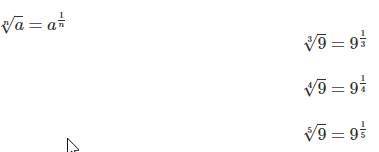

In [ ]:
DECLARE @My1 FLOAT = 16
DECLARE @My2 FLOAT = 4
SELECT POWER(@My1, 1/@My2)

Achtung bei den **Datentypen**

In [23]:
SELECT POWER(16, (1/4))
SELECT POWER(Cast(16 as float), (1/Cast(4 as float)))

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.012

(No column name)
1


(No column name)
2
